In [1]:
import pandas as pd
import json
import glob
import os
import konlpy
from konlpy.tag import Okt #형태소 추출
import re # regular expressions
from collections import Counter
os.getcwd()

'C:\\Users\\User\\workshop\\영상데이터분석'

In [21]:
import numpy as np
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout, LSTM, Bidirectional, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold

In [2]:
def text_prepro(text):
    sentences = re.split(r'[\.\?\!]+', text)
    # 한글만 추출 (한글이 아닌 케이스를 패턴으로 컴파일)
    filter_ = re.compile('[^ㄱ-ㅎ|ㅏ-ㅣ|가-힣]+')
    
    # 문장 단위로 추출
    filtered_sentences = []
    for sentence in sentences:
        filtered_sentences.append(filter_.sub(' ', sentence))
    
    # # 불용어 리스트
    stopwords = ['의', '부', '일', '면서', '차', '그간', '만', '약', '년', '전', '얼마나', '그', '등', '또', '것', '며', '를', '때문', '라며', '당시',
                '모든', '이', '측은', '수', '번', '개', '고', '아야', '월', '지난', '내년', '앞', '료', '건', '스', '때', '더', '회', '분', '날', '쪽',
                '잔', '자', '좀', '각', '간', '초', '말', '경우', '곳', '중', '내', '관련', '바로', '한편', '앞서', '이번', '자기', '억', '주로',
                '뒤', '낼', '및', '조', '중', '위해', '억원', '확', '앞서', '바', '다', '계', '첫', '사', '로', '현', '회', '각각', '률', '폭',
                '처', '측', '단', '뚝', '기', '호', '속', '건', '두', '코', '로', '한편', '걸', '안', '이번', '류', '데', '것이므', '례', '과', '로서',
                '율', '온', '즉', '익', '여기', '와', '는', '역시', '다해', '끼', '만큼', '세', '매우', '천', '꽤', '어가', '중이', '거나', '해',
                '기', '여개', '제', '다다', '나', '네', '형', '므', '민', '주', '기', '위핸', '타', '채', '설', '단', '팅', '더', '번', '심지어', 
                '것일', '뿐', '온', '유', '대해', '서도', '켜', '간의']
    
    # # okt를 활용하여 명사만 추출하고, 불용어는 제거하여 리스트 생성
    okt = Okt()
    
    # # 불용어는 제외한 명사 리스트
    cleaned_noun_list = []
    
    # # 불용어 제거한 명사로 이루어진 문장 리스트
    cleaned_sentence_list = []
    for sentence in filtered_sentences:
        nouns = okt.nouns(sentence)
        clean_contents = [noun for noun in nouns if not noun in stopwords]
        cleaned_noun_list.extend(clean_contents)
        # cleaned_sentence_list.append(clean_contents)

    return cleaned_noun_list

In [3]:
def data_return(path): # 경로를 입력해서 데이터 전처리해서 리턴
    json_files = os.path.join(path, '*.json')
    json_files
    file_list = glob.glob(json_files) # glob은 특수문자(* 등)도 고려해서 파일을 가져옴

    data = pd.DataFrame()
    for f in file_list:
      temp = pd.read_json(f)
      data = pd.concat([data, temp['sourceDataInfo']], axis=1, ignore_index=True)
    
    data = data.transpose()
    
    for idx,f in enumerate(file_list):
      temp = pd.read_json(f)
      data.loc[idx, "newTitle"]=temp['labeledDataInfo']['newTitle'] # transpose() 하기 전에 idx값이 유효하지않음
      data.loc[idx, 'title_content'] = temp['labeledDataInfo']['newTitle'] + ' ' + temp['sourceDataInfo']['newsContent']
    
    data.drop(labels=['newsID','newsCategory','newsSubcategory','newsTitle','newsSubTitle','newsContent','partNum','processType','processPattern',
              'processLevel','sentenceCount','sentenceInfo','newTitle','clickbaitClass','referSentenceInfo'],axis=1, inplace = True)
    
    for i in data.index:
        data.title_content[i] = text_prepro(data.title_content[i])
    return data

In [92]:
data1 = data_return('test_datasets_ver2/test_datasets (1)')

In [119]:
#데이터 불러서 변수마다 저장
for i in range(28,42):
    globals()[f'data{i}'] = data_return(f'test_datasets_ver2/test_datasets ({i})')

In [120]:
#데이터 pickle저장
for i in range(28,42):
    globals()[f'data{i}'].to_pickle(f"pickle2/df{i}.pkl")

In [6]:
data = pd.read_pickle('pickle/df2.pkl')

In [4]:
#저장한 pickle 데이터 불러오기
for i in range(1,42):
    globals()[f'data{i}'] = pd.read_pickle(f'pickle2/df{i}.pkl')

In [5]:
data23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   useType        1000 non-null   object
 1   title_content  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [7]:
data_t = pd.DataFrame()

In [6]:
for i in range(1, 42):
    if(i < 2):
        data_t = pd.concat([globals()[f'data{i}'],  globals()[f'data{i+1}']], axis=0, ignore_index=True)
    else:
        data_t = pd.concat([data_t,  globals()[f'data{i}']], axis=0, ignore_index=True)

In [7]:
data_t

,useType,title_content
0,0,"[친환경, 금융, 목표, 탄소, 중립, 실천, 나선, 금융업, 사죄, 운전기사, 허..."
1,0,"[공동, 주택, 하자, 분쟁, 조정, 본격, 최종, 구, 금융, 위원회, 위원장, ..."
2,0,"[생활, 건강, 사상, 최대, 실적, 주가, 반등, 글쎄, 한국, 기업, 지배구조,..."
3,0,"[로봇청소기, 강, 코오롱, 글로벌, 국내, 론칭, 요즘, 프로보노, 사회, 공헌,..."
4,0,"[한숨, 유통업, 매출, 런던, 현지, 시각, 스탠다드, 앤, 어스, 다우존스, 인..."
...,...,...
41993,1,"[공정위, 임대주택, 화재보험, 담합, 손, 보사, 과징금, 국토, 주택, 공사, ..."
41994,1,"[역대, 최장수, 기재, 장관, 홍, 가장, 순간, 국민, 재난, 원금, 지급, 임..."
41995,1,"[시장, 금리, 카드, 론, 금리, 왜, 국내, 주요, 카드, 장기, 카드, 대출,..."
41996,1,"[티몬, 이디야, 커피, 메뉴, 출시, 기념, 라이브, 방송, 할인, 판매, 티몬,..."


In [53]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 61964
등장 빈도가 2번 이하인 희귀 단어의 수: 24569
단어 집합에서 희귀 단어의 비율: 39.650442192240654
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.4148729704385074


In [54]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 37396


In [ ]:
token = Tokenizer(num_words = 37396) # 수정한 단어 집합의 크기로 토큰화
token.fit_on_texts(data_t.title_content)
print(token.word_index)

In [62]:
x = token.texts_to_sequences(data_t.title_content)

In [65]:
import matplotlib.pyplot as plt

리뷰의 최대 길이 : 860
리뷰의 평균 길이 : 183.44892613933996


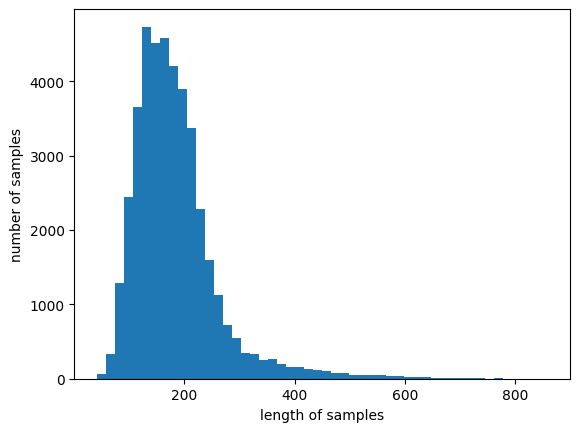

In [66]:
print('리뷰의 최대 길이 :',max(len(review) for review in x))
print('리뷰의 평균 길이 :',sum(map(len, x))/len(x))
plt.hist([len(review) for review in x], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [67]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [87]:
max_len = 330
below_threshold_len(max_len, x)

전체 샘플 중 길이가 330 이하인 샘플의 비율: 95.18072289156626


In [63]:
print(x[:3])

[[217, 3, 226, 353, 758, 709, 1538, 992, 16618, 12119, 27556, 10649, 4632, 13188, 3046, 198, 8436, 4892, 76, 2254, 10086, 6708, 125, 10527, 155, 3706, 2563, 1666, 521, 37, 25688, 3454, 156, 5197, 521, 37, 25688, 20130, 5331, 513, 1896, 16618, 1105, 9545, 486, 1680, 16618, 952, 1411, 12119, 22995, 395, 125, 207, 52, 125, 268, 285, 2254, 197, 1124, 268, 285, 1449, 1086, 76, 893, 237, 285, 1132, 6175, 76, 3454, 156, 5197, 438, 37, 125, 10415, 20936, 368, 10527, 76, 5618, 12119, 20, 10649, 934, 1693, 3314, 1124, 6176, 1576, 5315, 33061, 20937, 785, 11657, 83, 3984, 764, 1124, 2254, 7972, 268, 29901, 8988, 194, 22], [306, 49, 2720, 1223, 389, 303, 405, 1177, 3, 116, 589, 294, 3, 51, 3, 3917, 690, 44, 244, 721, 204, 51, 3, 1289, 71, 116, 482, 589, 51, 3, 1289, 71, 116, 4146, 3247, 317, 51, 3, 1289, 4185, 294, 3, 232, 1837, 44, 177, 4807, 557, 294, 3, 51, 90, 198, 430, 140, 15, 3, 952, 482, 589, 51, 2, 51, 137, 828, 232, 140, 86, 721, 670, 346, 4204, 304, 345, 441, 140, 4204, 534, 12120, 816,

In [10]:
'JAVA_HOME' in os.environ.keys()

True

In [2]:
import numpy as np
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout, LSTM, Bidirectional, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

In [109]:
model = Sequential()
model.add(Embedding(37396, 64, input_length=330))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 330, 64)           2393344   
                                                                 
 bidirectional_27 (Bidirecti  (None, 128)              66048     
 onal)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 flatten_13 (Flatten)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,459,521
Trainable params: 2,459,521
Non-trainable params: 0
___________________________________________

In [22]:
kfold = StratifiedKFold(n_splits=3, shuffle=True)

In [17]:
v_data = pd.read_pickle('vaild_pickle/v_df.pkl') # 검증용 데이터셋 불러오기

In [94]:
v_docs = v_data.title_content
v_classes = v_data.useType.astype(np.float32)
vx = token.texts_to_sequences(v_docs)
v_padded_x = pad_sequences(vx, maxlen = 330, padding='post', truncating='post')

In [ ]:
for i in range(1, 42):
  docs = globals()[f'data{i}'].title_content
  classes = globals()[f'data{i}'].useType.astype(np.float32)
  # 모델 훈련
  for train_index, test_index in kfold.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      es = EarlyStopping(monitor='accuracy', mode='max', verbose = 1, patience=2)
      model.fit(X_train, y_train, epochs=10, batch_size=32,verbose=2, callbacks=[es])

      # 모델의 평가
      result = model.evaluate(v_padded_x, v_classes)
      print(f'손실값(binary_crossentropy): {result[0]}, 정확도(accuracy): {result[1]}')
      print(f'{i}번째 데이터 학습중')

In [39]:
print(token.word_index)
print("\n패딩 후:\n", padded_x)

{'수': 1, '월': 2, '이': 3, '고': 4, '사업': 5, '지역': 6, '기업': 7, '위': 8, '통해': 9, '및': 10, '억원': 11, '관계자': 12, '말': 13, '시장': 14, '위해': 15, '금융': 16, '진행': 17, '개': 18, '지원': 19, '지난': 20, '서비스': 21, '고객': 22, '이번': 23, '대전': 24, '대한': 25, '중': 26, '기술': 27, '제품': 28, '개발': 29, '상품': 30, '건설': 31, '코로나': 32, '미디어': 33, '계획': 34, '올해': 35, '한국': 36, '제공': 37, '원': 38, '명': 39, '대표': 40, '로': 41, '국내': 42, '경우': 43, '점': 44, '은행': 45, '대출': 46, '지난해': 47, '예정': 48, '관련': 49, '판매': 50, '사회': 51, '투자': 52, '설명': 53, '만원': 54, '주택': 55, '시': 56, '증가': 57, '그룹': 58, '운영': 59, '이상': 60, '정부': 61, '대상': 62, '산업': 63, '때문': 64, '브랜드': 65, '사용': 66, '소비자': 67, '달': 68, '은': 69, '상황': 70, '최근': 71, '현재': 72, '내': 73, '기준': 74, '대비': 75, '매출': 76, '더': 77, '확대': 78, '업체': 79, '곳': 80, '환경': 81, '세대': 82, '이후': 83, '직원': 84, '행사': 85, '지속': 86, '회장': 87, '롯데': 88, '조': 89, '가격': 90, '활용': 91, '층': 92, '한편': 93, '참여': 94, '추진': 95, '총': 96, '규모': 97, '날': 98, '경영': 99, '관리': 100, '또한': 101, '억': 102, '회

In [161]:
result = model.evaluate(v_padded_x, v_classes)
print(f'손실값(binary_crossentropy): {result[0]}, 정확도(accuracy): {result[1]}')

63/63 [==============================] - 3s 41ms/step - loss: 0.4293 - accuracy: 0.9020
손실값(binary_crossentropy): 0.42933547496795654, 정확도(accuracy): 0.9020000100135803


In [166]:
predictions = model.predict(v_padded_x)
print(predictions)

[[8.78613791e-05]
 [1.02413535e-01]
 [9.15237542e-05]
 ...
 [9.97721434e-01]
 [9.99302626e-01]
 [9.99905765e-01]]


In [167]:
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
print(predictions)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [168]:
for i in range(1,10):
    print(f"{i}번째 실제값:{v_data.useType[i]}")
    print(f"{i}번째 예측값:{predictions[i]}")

1번째 실제값:0
1번째 예측값:[0.]
2번째 실제값:0
2번째 예측값:[0.]
3번째 실제값:0
3번째 예측값:[0.]
4번째 실제값:0
4번째 예측값:[0.]
5번째 실제값:0
5번째 예측값:[1.]
6번째 실제값:0
6번째 예측값:[0.]
7번째 실제값:0
7번째 예측값:[0.]
8번째 실제값:0
8번째 예측값:[0.]
9번째 실제값:0
9번째 예측값:[0.]


In [156]:
cnt = 0
for i in range(1, len(predictions)):
    if(f"{v_data.useType[i]}" == f"{predictions[i][0].astype(np.int32)}"):
        cnt +=1
c = predictions[i][0].astype(np.int32)
print(cnt - c)
print(cnt)

1802
1803


In [111]:
model.save('val_evaluate_0.90_model.h5')